In [139]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import os

import pandas as pd
import seaborn as sns

In [140]:
df_station_overview = pd.read_csv('../data/raw/fetched_eco_bike_data - overall_germany.csv')

In [141]:
df_station_overview.head()

city  number   latitude  longitude    id_list  \
0  Aschaffenburg       1  49.973150   9.150790  100046798   
1         Berlin       1  52.514066  13.417751  100024661   
2         Berlin       2  52.527180  13.372020  100032152   
3         Berlin       3  52.513739  13.474367  100032154   
4         Berlin       4  52.566810  13.412170  100032155   

   Distance to center [km]                                        fetched_url  
0                   0.1432  https://data.eco-counter.com/public2/?id=10004...  
1                   1.9827  https://data.eco-counter.com/public2/?id=10002...  
2                   1.6032  https://data.eco-counter.com/public2/?id=10003...  
3                   5.7977  https://data.eco-counter.com/public2/?id=10003...  
4                   5.7547  https://data.eco-counter.com/public2/?id=10003...

In [142]:
df = pd.DataFrame()

In [143]:
folder = '../data/raw/stations/'
for file in os.listdir(folder):
    if file.endswith(".csv"):
#         print(file)
        df_current_station = pd.read_csv(folder+file)
        df_current_station['station_name'] = file.split('.')[0]
        df = df.append(df_current_station, ignore_index=True)

In [144]:
df.head()

Unnamed: 0                 date  comptage      timestamp station_name
0           0  2017-11-28 00:00:00         0  1511827200000   Rostock_11
1           1  2017-11-28 01:00:00         0  1511830800000   Rostock_11
2           2  2017-11-28 02:00:00         0  1511834400000   Rostock_11
3           3  2017-11-28 03:00:00         0  1511838000000   Rostock_11
4           4  2017-11-28 04:00:00         0  1511841600000   Rostock_11

In [145]:
df['datetime'] = df.timestamp.map(lambda x: datetime.fromtimestamp(x/1000))

In [146]:
df['year'] = df.datetime.map(lambda x: x.year)
df['month'] = df.datetime.map(lambda x: x.month)
df['weekday'] = df.datetime.map(lambda x: x.weekday())
df['hour'] = df.datetime.map(lambda x: x.hour)

In [147]:
df.head()

Unnamed: 0                 date  comptage      timestamp station_name  \
0           0  2017-11-28 00:00:00         0  1511827200000   Rostock_11   
1           1  2017-11-28 01:00:00         0  1511830800000   Rostock_11   
2           2  2017-11-28 02:00:00         0  1511834400000   Rostock_11   
3           3  2017-11-28 03:00:00         0  1511838000000   Rostock_11   
4           4  2017-11-28 04:00:00         0  1511841600000   Rostock_11   

             datetime  year  month  weekday  hour  
0 2017-11-28 01:00:00  2017     11        1     1  
1 2017-11-28 02:00:00  2017     11        1     2  
2 2017-11-28 03:00:00  2017     11        1     3  
3 2017-11-28 04:00:00  2017     11        1     4  
4 2017-11-28 05:00:00  2017     11        1     5

In [148]:
df.station_name.nunique()

83

In [149]:
df_station_overview['station_name'] = df_station_overview.apply(
    lambda x: x.city + '_' + str(x.number),
    axis=1
)

In [150]:
df_station_overview.head()

city  number   latitude  longitude    id_list  \
0  Aschaffenburg       1  49.973150   9.150790  100046798   
1         Berlin       1  52.514066  13.417751  100024661   
2         Berlin       2  52.527180  13.372020  100032152   
3         Berlin       3  52.513739  13.474367  100032154   
4         Berlin       4  52.566810  13.412170  100032155   

   Distance to center [km]                                        fetched_url  \
0                   0.1432  https://data.eco-counter.com/public2/?id=10004...   
1                   1.9827  https://data.eco-counter.com/public2/?id=10002...   
2                   1.6032  https://data.eco-counter.com/public2/?id=10003...   
3                   5.7977  https://data.eco-counter.com/public2/?id=10003...   
4                   5.7547  https://data.eco-counter.com/public2/?id=10003...   

      station_name  
0  Aschaffenburg_1  
1         Berlin_1  
2         Berlin_2  
3         Berlin_3  
4         Berlin_4

In [151]:
len(df_station_overview) == df_station_overview.station_name.nunique()

False

### need to clean data

In [152]:
df_station_overview.station_name[df_station_overview.station_name.duplicated()]

25    Düsseldorf_1
57       Rostock_2
Name: station_name, dtype: object

In [153]:
df.to_csv('../data/processed/all_stations.csv')

## check data

In [154]:
df.groupby('station_name').size()

station_name
Aschaffenburg_1    110100
Berlin_1           201408
Berlin_10          189866
Berlin_11          189022
Berlin_12          201477
                    ...  
Stuttgart_5         44441
Stuttgart_6         41129
Stuttgart_7         37806
Stuttgart_8         37802
Stuttgart_9         37809
Length: 83, dtype: int64

In [155]:
df.groupby('station_name').datetime.min().sort_values().tail(20)

station_name
Bochum_2       2018-11-22 01:00:00
Osnabrück_1   2019-05-01 02:00:00
Darmstadt_1    2019-10-09 02:00:00
Köln_12       2019-10-31 02:00:00
Köln_13       2020-03-05 01:00:00
Rostock_12     2020-03-16 11:15:00
Stuttgart_5    2020-06-23 02:00:00
Stuttgart_12   2020-07-27 19:15:00
Stuttgart_14   2020-07-27 19:30:00
Stuttgart_6    2020-07-28 11:15:00
Stuttgart_15   2020-07-28 12:45:00
Stuttgart_10   2020-09-01 02:00:00
Stuttgart_13   2020-09-01 02:00:00
Stuttgart_8    2020-09-01 02:00:00
Stuttgart_7    2020-09-01 02:00:00
Stuttgart_11   2020-09-01 02:00:00
Stuttgart_9    2020-09-01 02:00:00
Köln_14       2020-11-23 15:00:00
Köln_15       2020-11-25 14:00:00
Berlin_18      2021-07-27 02:00:00
Name: datetime, dtype: datetime64[ns]

### check out one stations development over months

In [171]:
station_name = 'Berlin_2'
one_station = df[df.station_name == station_name]

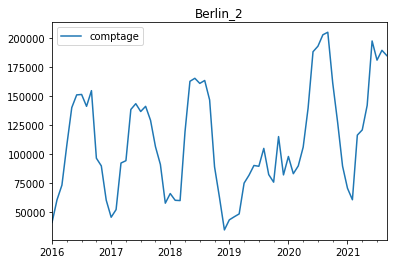

In [172]:
plot_data = one_station.groupby(['year', 'month']).comptage.sum().reset_index()
plot_data.set_index(pd.to_datetime({
    'day': 1,
    'month': plot_data.pop('month'),
    'year': plot_data.pop('year')
})).plot()
plt.title(station_name);

<ipython-input-158-e4295518fa7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_station['day'] = one_station.datetime.map(lambda x: x.day)


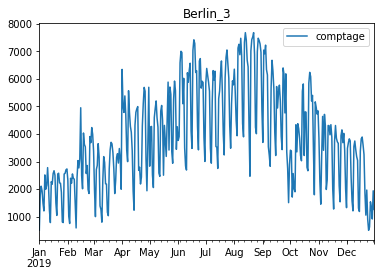

In [158]:
one_station['day'] = one_station.datetime.map(lambda x: x.day)

plot_data = one_station[one_station.year == 2019].groupby(['month', 'day']).comptage.sum().reset_index()
plot_data.set_index(pd.to_datetime({
    'day': plot_data.pop('day'),
    'month': plot_data.pop('month'),
    'year': 2019
})).plot()
plt.title(station_name);

### one station compare months

In [159]:
station_name = 'Berlin_3'
one_station = df[df.station_name == station_name]

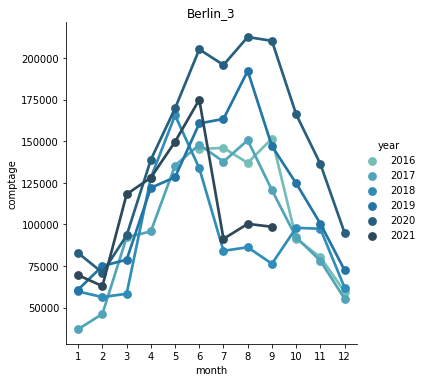

In [161]:
plot_data = one_station.groupby(['year', 'month']).comptage.sum().reset_index()
sns.catplot(data=plot_data,
            x="month", y="comptage", hue="year",
            palette="YlGnBu_d",
            kind="point");
plt.title(station_name);

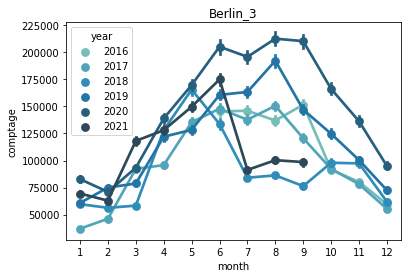

In [162]:
sns.pointplot(data=one_station,
            x="month", y="comptage", hue="year",
            estimator=np.sum,
            palette="YlGnBu_d",
            kind="point");
plt.title(station_name);

### the yearly development of the first city counters in each city

In [163]:
is_first_station_in_city = df.station_name.str.split('_').map(lambda x: x[-1]) == '1'
plot_data = df[is_first_station_in_city].groupby(['station_name', 'year']).comptage.sum().reset_index()

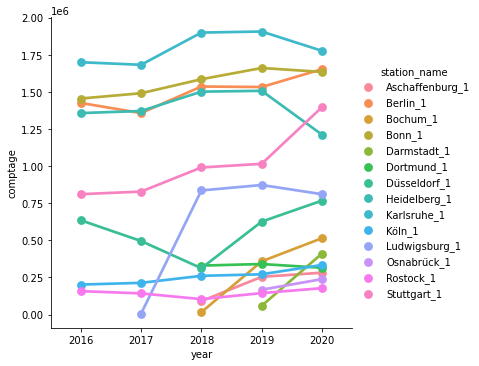

In [164]:
sns.catplot(data=plot_data[plot_data.year < 2021],
            x="year", y="comptage", hue="station_name",
            #palette="YlGnBu_d",
            kind="point");

### when do we see the most traffic

In [165]:
station_name = 'Berlin_1'
one_station = df[df.station_name == station_name]

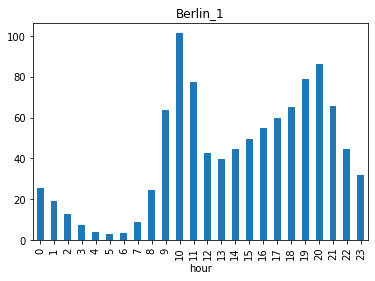

In [166]:
one_station.groupby('hour').comptage.mean().plot(kind='bar')
plt.title(station_name);

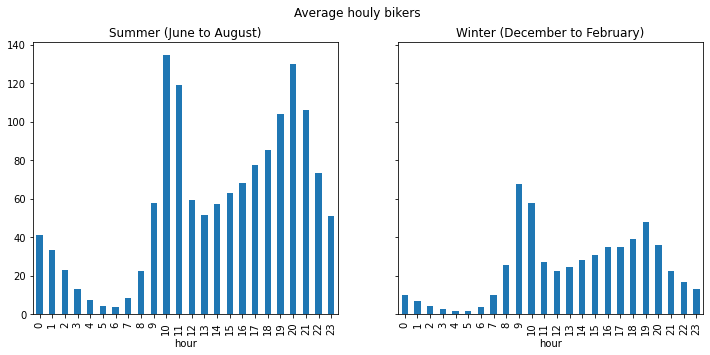

In [167]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# summer (june - august)
one_station[(one_station.month > 5) & (one_station.month < 9)].groupby('hour').comptage.mean().plot(
    kind='bar', ax=ax[0])
ax[0].set_title('Summer (June to August)')

# winter (dez - feb)
one_station[(one_station.month == 12) | (one_station.month < 3)].groupby('hour').comptage.mean().plot(
    kind='bar', ax=ax[1])
ax[1].set_title('Winter (December to February)')

fig.suptitle('Average houly bikers');

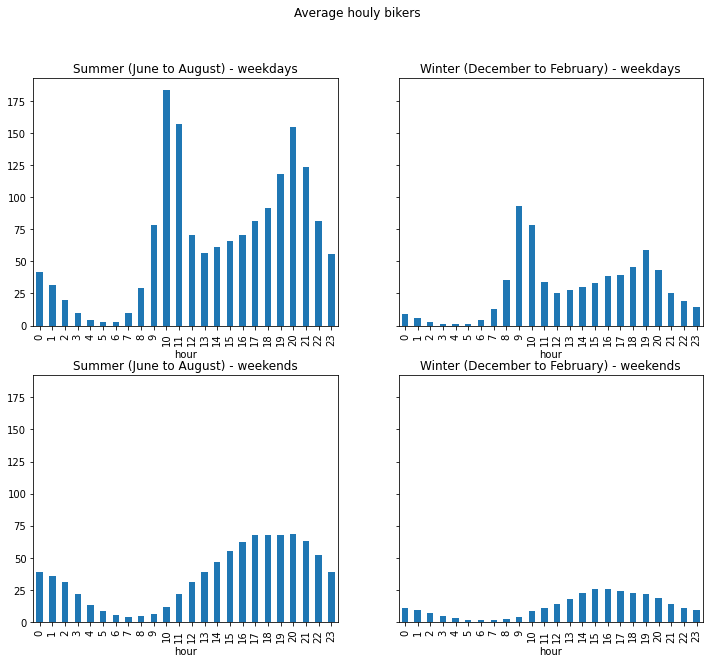

In [170]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# weekdays
# summer (june - august) 
one_station[
    (one_station.month > 5) & 
    (one_station.month < 9) &
    (one_station.weekday < 5) # saturday = 5, sunday = 6
].groupby('hour').comptage.mean().plot(
    kind='bar', ax=ax[0][0])
ax[0][0].set_title('Summer (June to August) - weekdays')

# winter (dez - feb)
one_station[
    (
        (one_station.month == 12) 
        | (one_station.month < 3)
    ) &
    (one_station.weekday < 5)
].groupby('hour').comptage.mean().plot(
    kind='bar', ax=ax[0][1])
ax[0][1].set_title('Winter (December to February) - weekdays')

# weekends
# summer (june - august) 
one_station[
    (one_station.month > 5) & 
    (one_station.month < 9) &
    (one_station.weekday >= 5) # saturday = 5, sunday = 6
].groupby('hour').comptage.mean().plot(
    kind='bar', ax=ax[1][0])
ax[1][0].set_title('Summer (June to August) - weekends')

# winter (dez - feb)
one_station[
    (
        (one_station.month == 12) 
        | (one_station.month < 3)
    ) &
    (one_station.weekday >= 5)
].groupby('hour').comptage.mean().plot(
    kind='bar', ax=ax[1][1])
ax[1][1].set_title('Winter (December to February) - weekends')

fig.suptitle('Average houly bikers');